This notebook is used to calculate correlation scores between our features and the average annotation scores. The correlation between features is also calculated.

Jupyter Notebook has to run from the directory '/src/classifier', to make the imports work. Some packages may need to be installed.

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import  RandomForestClassifier
from scipy.stats import pearsonr
import data_loader
import vectorizer
import features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config

2022-06-04 20:14:44.504769: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-04 20:14:44.504790: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



----
Using the BookNLP path: ../../dataset/BookNLP_output/


In [2]:
# Load annotated filenames
X, _ = data_loader.load_annotated_data(threshold=2.5)
X = X.flatten()

Loading annotated data from: ../../dataset/MinNarrative_ReaderData_Final.csv


In [3]:
df = pd.read_csv('../../dataset/MinNarrative_ReaderData_Final.csv', delimiter=',')
annotation_scores = np.array([df.loc[df['FILENAME'] == fname]['avg_overall'] for fname in X]).flatten()

# Linguistic Features

In [4]:
adjadv = np.array([[features.adjadv(fname)] for fname in X]).flatten()
imp_concreteness = np.array([[features.improved_concreteness(fname)] for fname in X]).flatten()
sequencers = np.array([[features.sequencers(fname)] for fname in X]).flatten()
deictic = np.array([[features.deictic(fname)] for fname in X]).flatten()
perceptual_verbs_spatial_prepositions = np.array([[features.perceptual_verbs_spatial_prepositions(fname)] for fname in X]).flatten()

(0.016575417778903468, 0.7627954702119023)

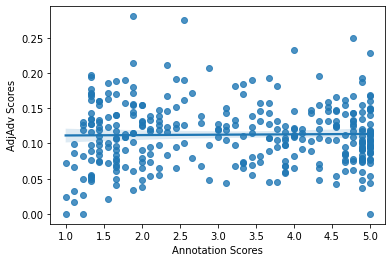

In [5]:
data = pd.DataFrame({'Annotation Scores':annotation_scores, 'AdjAdv Scores': adjadv})
sns.regplot(data=data, x="Annotation Scores", y="AdjAdv Scores")
pearsonr(annotation_scores, adjadv)

(0.240764139345293, 8.617113540523157e-06)

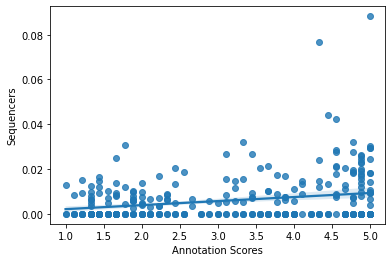

In [6]:
data = pd.DataFrame({'Annotation Scores':annotation_scores, 'Sequencers': sequencers})
sns.regplot(data=data, x="Annotation Scores", y="Sequencers")
pearsonr(annotation_scores, sequencers)

(0.3869447471939315, 2.2545329064882062e-13)

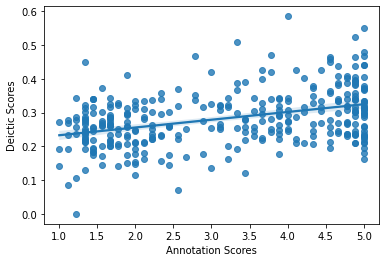

In [7]:
data = pd.DataFrame({'Annotation Scores':annotation_scores, 'Deictic Scores': deictic})
sns.regplot(data=data, x="Annotation Scores", y="Deictic Scores")
pearsonr(annotation_scores, deictic)

(0.20695483728631622, 0.0001393160954407035)

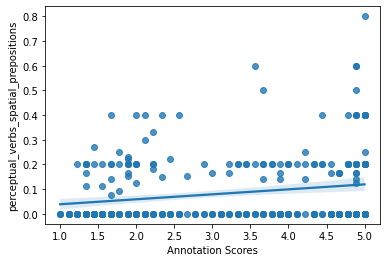

In [8]:
data = pd.DataFrame({'Annotation Scores':annotation_scores, 'perceptual_verbs_spatial_prepositions': perceptual_verbs_spatial_prepositions})
sns.regplot(data=data, x="Annotation Scores", y="perceptual_verbs_spatial_prepositions")
pearsonr(annotation_scores, perceptual_verbs_spatial_prepositions)

# Improved Concreteness

(0.6208219981676796, 5.624076454912097e-37)

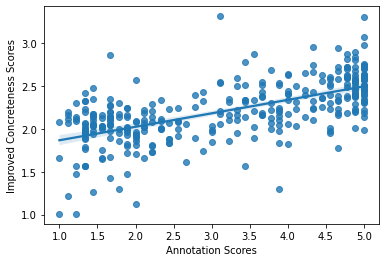

In [9]:
data = pd.DataFrame({'Annotation Scores':annotation_scores, 'Improved Concreteness Scores': imp_concreteness})
sns.regplot(data=data, x="Annotation Scores", y='Improved Concreteness Scores')
pearsonr(annotation_scores, imp_concreteness)

# Lexical Diversity

In [1]:
# !pip3 install lexical_diversity
from lexical_diversity import lex_div as ld
import csv

In [11]:
def mtld_bid(fname):
    df = pd.read_csv(config.BOOK_PATH + fname + '/' + fname + '.tokens', delimiter='\t', quoting=csv.QUOTE_NONE)
    df.fillna("", inplace=True)
    word_list = features.filter_punct(features.get_words(df))
    return ld.mtld_ma_bid(word_list)

def ttr(fname):
    df = pd.read_csv(config.BOOK_PATH + fname + '/' + fname + '.tokens', delimiter='\t', quoting=csv.QUOTE_NONE)
    df.fillna("", inplace=True)
    word_list = features.filter_punct(features.get_words(df))
    return ld.ttr(word_list)

In [12]:
ttr_scores = np.array([[ttr(fname)] for fname in X]).flatten()
mtld_bid_scores = np.array([[mtld_bid(fname)] for fname in X]).flatten()

(0.38327159801993466, 3.949309273761673e-13)

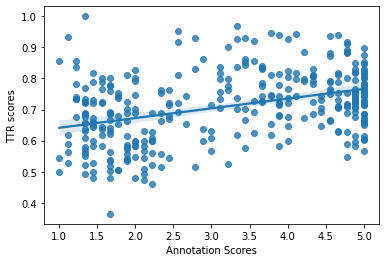

In [13]:
data = pd.DataFrame({'Annotation Scores':annotation_scores, 'TTR scores': ttr_scores})
sns.regplot(data=data, x="Annotation Scores", y="TTR scores")
pearsonr(annotation_scores, ttr_scores)

(-0.21910653520166035, 5.3797635567449174e-05)

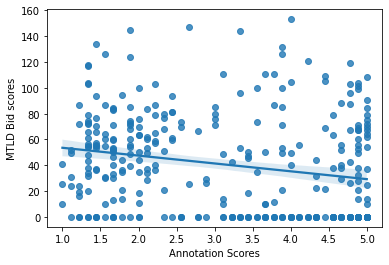

In [14]:
data = pd.DataFrame({'Annotation Scores':annotation_scores, 'MTLD Bid scores': mtld_bid_scores})
sns.regplot(data=data, x="Annotation Scores", y="MTLD Bid scores")
pearsonr(annotation_scores, mtld_bid_scores)

# Correlation between features

<AxesSubplot:>

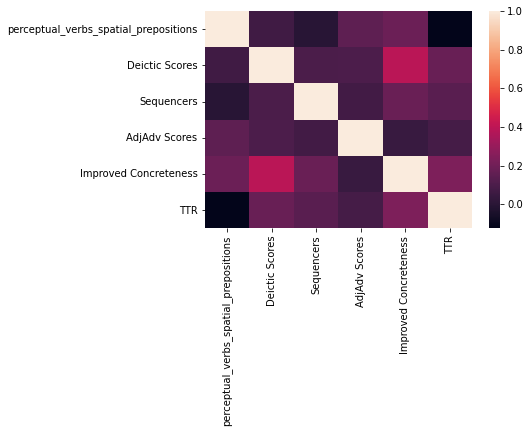

In [17]:
data = pd.DataFrame({
    'perceptual_verbs_spatial_prepositions': perceptual_verbs_spatial_prepositions,
    'Deictic Scores': deictic,
    'Sequencers': sequencers,
    'AdjAdv Scores': adjadv,
    'Improved Concreteness': imp_concreteness,
    'TTR': ttr_scores
})

corr = data.corr()
sns.heatmap(corr)